In [1]:
import pandas as pd
import sqlite3
from os import path
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')
#bdPath = path.join("..", "BD", "bd.db")
bdPath = path.join("bd.db")

In [2]:
bd = sqlite3.connect(bdPath) 

jogadores = pd.read_sql('SELECT summonerId, nick, jogador.elo, eloNum, pdl, vitorias, derrotas, winrate FROM jogador INNER JOIN elo ON elo.elo = jogador.elo', bd)
jogadoresPartida = pd.read_sql('SELECT gameId, time, summonerId, campeaoNome, kdaPartida, danoPartida, wardsPartida, csPartida FROM jogador_partida', bd)
campeoesJogadores = pd.read_sql('SELECT campeaoId, campeaoNome, campeaoPref, summonerId, partidas, vitorias, derrotas, campeao_jogador.winrate, kda FROM campeao_jogador INNER JOIN campeao ON campeao.nome = campeao_jogador.campeaoNome', bd)
partidas = pd.read_sql('SELECT * FROM partida', bd)
campeoes = pd.read_sql('SELECT * FROM campeao', bd)
elos = pd.read_sql('SELECT * FROM elo', bd)

bd.close()

In [3]:
jogadores.head(5)

,summonerId,nick,elo,eloNum,pdl,vitorias,derrotas,winrate
0,400150,Mxu,Diamond 4,17,0,151,135,53.0
1,400152,Jackie,Diamond 2,19,51,125,99,56.0
2,400158,Cico,Platinum 2,15,17,210,217,49.0
3,400163,Lopesxz,Diamond 4,17,72,200,182,52.0
4,400165,VoIpe,Diamond 4,17,0,111,85,57.0


In [4]:
jogadoresPartida.head(5)

,gameId,time,summonerId,campeaoNome,kdaPartida,danoPartida,wardsPartida,csPartida
0,1563559582,0,4797336,Ezreal,1.86,27705,13,239
1,1563559582,0,1694609,Lee Sin,2.12,17575,29,170
2,1563559582,0,2795780,Gangplank,1.00,25761,8,271
3,1563559582,0,5262450,Irelia,1.20,18159,14,257
4,1563559582,0,6731659,Braum,2.17,6728,24,71


In [5]:
campeoesJogadores.head(5)

,campeaoId,campeaoNome,campeaoPref,summonerId,partidas,vitorias,derrotas,winrate,kda
0,81,Ezreal,1,400152,7,3,4,0,1.81
1,79,Gragas,2,400152,3,2,1,100,6.43
2,518,Neeko,3,400152,3,2,1,67,2.07
3,39,Irelia,4,400152,3,1,2,67,1.45
4,412,Thresh,5,400152,2,2,0,33,4.53


In [6]:
partidas.head(5)

,gameId,vitoria,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t2_baronKills,t1_baronKills,...,t2_riftHeraldKills,t1_riftHeraldKills,t2_towerKills,t1_towerKills,t2_inhibitorKills,t1_inhibitorKills,killsRed,killsBlue,goldRed,goldBlue
0,1543573986,1,1,1,-1,1,1,1,1,0,...,1,0,6,1,0,0,21,12,46575,36360
1,1543611352,0,0,0,0,0,0,0,0,1,...,0,1,1,10,0,3,25,31,49301,60375
2,1543624002,0,0,0,0,-1,0,0,0,0,...,0,1,1,8,0,1,14,32,33345,45680
3,1543626176,0,1,0,0,1,0,1,1,0,...,1,0,2,9,0,1,22,37,49688,57545
4,1543651094,0,1,0,0,0,0,0,0,3,...,0,1,4,10,0,4,31,42,67279,76653


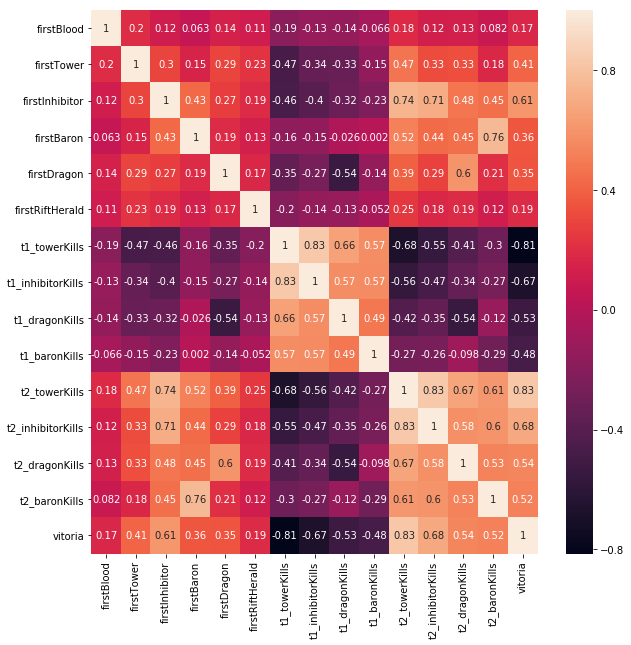

In [7]:
#Correlações dos dados de dentro da partida
fig = plt.figure(figsize=(10,10))
sns.heatmap(partidas[['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_dragonKills', 't1_baronKills', 
                  't2_towerKills', 't2_inhibitorKills', 't2_dragonKills', 't2_baronKills', 'vitoria']].corr(), annot=True)

In [8]:
#Testando a partir de marcos (primeira torre, primeira morte e primeiros monstros)
x = partidas[['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald']]
y = partidas['vitoria']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      2805
           1       0.87      0.83      0.85      2730

   micro avg       0.86      0.86      0.86      5535
   macro avg       0.86      0.86      0.86      5535
weighted avg       0.86      0.86      0.86      5535



In [9]:
#Testando a partir de poucos marcos (primeira torre, primeira morte e primeiros monstros)
x = partidas[['firstTower']]
y = partidas['vitoria']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      2835
           1       0.70      0.69      0.69      2700

   micro avg       0.70      0.70      0.70      5535
   macro avg       0.70      0.70      0.70      5535
weighted avg       0.70      0.70      0.70      5535



In [10]:
#Testando a partir de objetivos destruidos (qtd de Torres e Inibidores)
x = partidas[['t1_towerKills', 't1_inhibitorKills', 't2_towerKills', 't2_inhibitorKills']]
y = partidas['vitoria']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2854
           1       0.96      0.96      0.96      2681

   micro avg       0.96      0.96      0.96      5535
   macro avg       0.96      0.96      0.96      5535
weighted avg       0.96      0.96      0.96      5535



In [11]:
bd = sqlite3.connect(bdPath) 

jogadoresPartida2 = pd.read_sql('SELECT jogador_partida.gameId, jogador_partida.time, jogador_partida.summonerId, jogador_partida.campeaoNome, campeao.campeaoId, kdaPartida, danoPartida, wardsPartida, csPartida, partida.vitoria FROM jogador_partida INNER JOIN partida ON jogador_partida.gameId = partida.gameId INNER JOIN campeao ON campeao.nome = jogador_partida.campeaoNome', bd)

bd.close()

In [12]:
jogadoresPartida2.head(10)

,gameId,time,summonerId,campeaoNome,campeaoId,kdaPartida,danoPartida,wardsPartida,csPartida,vitoria
0,1543573986,1,11500133,Zyra,143,4.50,13637,18,28,1
1,1543611352,0,479335,Zyra,143,2.75,12319,22,49,0
2,1543624002,0,484985,Zyra,143,2.40,13527,10,27,0
3,1543626176,0,479335,Zyra,143,3.60,18758,29,26,0
4,1544462936,0,1210077,Zyra,143,1.75,13336,19,25,1
5,1544763652,1,2004770,Zyra,143,1.25,5667,6,24,1
6,1544770813,0,4041786,Zyra,143,9.00,13069,7,132,0
7,1544887979,0,30622387,Zyra,143,2.14,18967,19,47,1
8,1544901220,0,553301,Zyra,143,0.00,6350,4,111,1
9,1544908512,1,417730,Zyra,143,5.33,8861,12,37,1


In [13]:
#Testando com base no desempenho individual do jogador naquela partida
x = jogadoresPartida2[['summonerId', 'time', 'campeaoId', 'kdaPartida', 'danoPartida', 'wardsPartida', 'csPartida']]
y = jogadoresPartida2['vitoria']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       0.51      0.97      0.67     32614
           1       0.52      0.04      0.07     31206

   micro avg       0.51      0.51      0.51     63820
   macro avg       0.52      0.50      0.37     63820
weighted avg       0.52      0.51      0.37     63820



In [14]:
bd = sqlite3.connect(bdPath)
prePartida = pd.read_sql('SELECT jogador_partida.gameId, jogador_partida.time, partida.vitoria, jogador_partida.summonerId, jogador_partida.campeaoNome, campeao_jogador.campeaoPref, campeao_jogador.partidas, campeao_jogador.vitorias, campeao_jogador.derrotas, campeao_jogador.winrate, campeao_jogador.kda  FROM jogador_partida INNER JOIN campeao_jogador ON jogador_partida.summonerId = campeao_jogador.summonerId AND jogador_partida.campeaoNome = campeao_jogador.campeaoNome INNER JOIN partida ON jogador_partida.gameId = partida.gameId', bd)
bd.close()

In [15]:
prePartida.head(10)

,gameId,time,vitoria,summonerId,campeaoNome,campeaoPref,partidas,vitorias,derrotas,winrate,kda
0,1563559582,0,1,2795780,Gangplank,1,71,39,32,55,2.45
1,1563559582,1,1,14411474,Kha'Zix,7,8,6,2,75,4.26
2,1563559582,1,1,4461435,Lissandra,1,60,38,22,63,2.71
3,1563559582,1,1,2242453,Kai'Sa,1,42,25,17,60,3.26
4,1563523256,0,1,494257,Vayne,7,9,4,5,44,2.15
5,1563523256,0,1,21312522,Elise,6,10,5,5,50,2.11
6,1563523256,1,1,2242453,Lucian,2,41,21,20,51,2.59
7,1563523256,1,1,400163,Braum,6,2,2,0,100,3.00
8,1563523256,1,1,14572212,Shaco,2,34,19,15,56,2.59
9,1561622886,0,0,6610622,Yasuo,2,10,6,4,60,1.69


In [16]:
#Testando apenas com dados pre-partida / historico com o campeao (Individual)
x = prePartida[['time', 'summonerId', 'campeaoPref', 'partidas', 'winrate', 'kda']]
y = prePartida['vitoria']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68     17505
           1       0.00      0.00      0.00     16773

   micro avg       0.51      0.51      0.51     34278
   macro avg       0.26      0.50      0.34     34278
weighted avg       0.26      0.51      0.35     34278



In [17]:
bd = sqlite3.connect(bdPath)
prePartida2 = pd.read_sql('SELECT jogador_partida.gameId, jogador_partida.time, partida.vitoria, jogador_partida.summonerId, jogador_partida.campeaoNome, campeao.campeaoId, campeao_jogador.campeaoPref, campeao_jogador.partidas, campeao_jogador.vitorias, campeao_jogador.derrotas, campeao_jogador.winrate, campeao_jogador.kda, jogador.nick, jogador.elo, elo.eloNum, jogador.winrate as winrateJog  FROM jogador_partida INNER JOIN campeao_jogador ON jogador_partida.summonerId = campeao_jogador.summonerId AND jogador_partida.campeaoNome = campeao_jogador.campeaoNome INNER JOIN partida ON jogador_partida.gameId = partida.gameId INNER JOIN jogador ON jogador.summonerId = jogador_partida.summonerId INNER JOIN elo ON jogador.elo = elo.elo INNER JOIN campeao ON campeao.nome = campeao_jogador.campeaoNome', bd)
bd.close()

prePartida2.head(10)

,gameId,time,vitoria,summonerId,campeaoNome,campeaoId,campeaoPref,partidas,vitorias,derrotas,winrate,kda,nick,elo,eloNum,winrateJog
0,1563559582,0,1,2795780,Gangplank,41,1,71,39,32,55,2.45,O Monstro,Diamond 4,17,50.0
1,1563559582,1,1,14411474,Kha'Zix,121,7,8,6,2,75,4.26,SugiroQueFlash,Diamond 4,17,51.0
2,1563559582,1,1,4461435,Lissandra,127,1,60,38,22,63,2.71,Fala que me Ama,Diamond 4,17,52.0
3,1563559582,1,1,2242453,Kai'Sa,145,1,42,25,17,60,3.26,Rock fella,Diamond 4,17,50.0
4,1563523256,0,1,494257,Vayne,67,7,9,4,5,44,2.15,Luke Waki,Diamond 4,17,50.0
5,1563523256,0,1,21312522,Elise,60,6,10,5,5,50,2.11,Critical,Diamond 4,17,50.0
6,1563523256,1,1,2242453,Lucian,236,2,41,21,20,51,2.59,Rock fella,Diamond 4,17,50.0
7,1563523256,1,1,400163,Braum,201,6,2,2,0,100,3.00,Lopesxz,Diamond 4,17,52.0
8,1563523256,1,1,14572212,Shaco,35,2,34,19,15,56,2.59,Pain game GG izi,Diamond 3,18,50.0
9,1561622886,0,0,6610622,Yasuo,157,2,10,6,4,60,1.69,Afr0Samuraiii,Diamond 4,17,51.0


In [18]:
#Testando apenas com dados pre-partida / historico com o campeao + historico do jogador (Individual)
x = prePartida2[['time', 'summonerId', 'campeaoId', 'campeaoPref', 'partidas', 'winrate', 'kda', 'eloNum', 'winrateJog']]
y = prePartida2['vitoria']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.4)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68     13987
           1       0.00      0.00      0.00     13435

   micro avg       0.51      0.51      0.51     27422
   macro avg       0.26      0.50      0.34     27422
weighted avg       0.26      0.51      0.34     27422



In [19]:
bd = sqlite3.connect(bdPath)
prePartidaTotal = pd.read_sql('SELECT partida.gameId, partida.vitoria, jogador_partida.time, jogador_partida.summonerId, jogador.winrate, jogador.vitorias, jogador.derrotas, campeao.campeaoId, elo.eloNum, jogador.pdl, campeao_jogador.campeaoPref, campeao_jogador.partidas as partidasCamp, campeao_jogador.winrate as winrateCamp, campeao_jogador.vitorias as vitoriasCamp, campeao_jogador.derrotas as derrotasCamp, campeao_jogador.kda as kdaCamp FROM partida INNER JOIN jogador_partida ON jogador_partida.gameId = partida.gameId INNER JOIN jogador ON jogador.summonerId = jogador_partida.summonerId INNER JOIN campeao ON campeao.nome = jogador_partida.campeaoNome INNER JOIN elo ON elo.elo = jogador.elo INNER JOIN campeao_jogador ON campeao_jogador.summonerId = jogador_partida.summonerId AND campeao_jogador.campeaoNome = jogador_partida.campeaoNome', bd)
#prePartidaTotal.to_sql("prePartida", bd, if_exists="replace")
bd.close()

In [20]:
prePartidaTotal = prePartidaTotal.sort_values(['gameId', 'time'])
prePartidaTotal.head(5)

,gameId,vitoria,time,summonerId,winrate,vitorias,derrotas,campeaoId,eloNum,pdl,campeaoPref,partidasCamp,winrateCamp,vitoriasCamp,derrotasCamp,kdaCamp
35368,1543573986,1,0,5655450,55.0,215,173,64,18,0,1,39,69,27,12,3.22
0,1543573986,1,1,11500133,50.0,189,186,143,18,56,1,26,69,18,8,3.34
14855,1543573986,1,1,34350392,72.0,73,29,91,17,75,1,84,76,64,20,3.48
55144,1543573986,1,1,8940999,50.0,1017,1023,81,17,54,3,41,49,20,21,2.31
1,1543611352,0,0,479335,57.0,208,160,143,18,0,1,37,76,28,9,3.84


In [21]:
#Valores agrupados por time
bd = sqlite3.connect(bdPath)
prePartidaPorTime = pd.read_sql('SELECT partida.gameId, partida.vitoria, jogador_partida.time,  SUM(jogador.winrate) AS winrateJogadores, SUM(jogador.vitorias) AS vitoriasJogadores, SUM(jogador.derrotas) AS derrotasJogadores, SUM(elo.eloNum) AS elosJogadores, SUM(jogador.pdl) AS pdlJogadores, SUM(campeao_jogador.campeaoPref) AS prefJogadores, SUM(campeao_jogador.partidas) as partidasCamp, SUM(campeao_jogador.winrate) as winrateCamp, SUM(campeao_jogador.vitorias) as vitoriasCamp, SUM(campeao_jogador.derrotas) as derrotasCamp, SUM(campeao_jogador.kda) as kdaCamp FROM partida INNER JOIN jogador_partida ON jogador_partida.gameId = partida.gameId INNER JOIN jogador ON jogador.summonerId = jogador_partida.summonerId INNER JOIN campeao ON campeao.nome = jogador_partida.campeaoNome INNER JOIN elo ON elo.elo = jogador.elo INNER JOIN campeao_jogador ON campeao_jogador.summonerId = jogador_partida.summonerId AND campeao_jogador.campeaoNome = jogador_partida.campeaoNome GROUP BY jogador_partida.gameId, jogador_partida.time', bd)
bd.close()

prePartidaPorTime.head(5)

,gameId,vitoria,time,winrateJogadores,vitoriasJogadores,derrotasJogadores,elosJogadores,pdlJogadores,prefJogadores,partidasCamp,winrateCamp,vitoriasCamp,derrotasCamp,kdaCamp
0,1543573986,1,0,55.0,215,173,18,0,1,39,69,27,12,3.22
1,1543573986,1,1,172.0,1279,1238,52,185,5,151,194,102,49,9.13
2,1543611352,0,0,269.0,1561,1396,87,276,17,295,296,175,120,13.12
3,1543611352,0,1,152.0,1043,1034,51,107,11,206,166,122,84,8.36
4,1543624002,0,0,166.0,1194,1119,58,92,11,39,150,22,17,7.48


In [22]:
#Testando apenas com dados somados de times separadamente
x = prePartidaPorTime[['time', 'winrateJogadores', 'vitoriasJogadores', 'derrotasJogadores', 'elosJogadores', 'pdlJogadores', 'prefJogadores', 'partidasCamp', 'winrateCamp', 'vitoriasCamp', 'derrotasCamp', 'kdaCamp']]
y = prePartidaPorTime['vitoria']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.4)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       0.51      0.63      0.56      4343
           1       0.47      0.36      0.41      4036

   micro avg       0.50      0.50      0.50      8379
   macro avg       0.49      0.49      0.48      8379
weighted avg       0.49      0.50      0.49      8379



In [23]:
is_par = prePartidaPorTime.index.astype(int) % 2 == 0
pares  = prePartidaPorTime[is_par]
impares  = prePartidaPorTime[~is_par]

#prePartidaPorTime2 = pares.join(impares, on='gameId', lsuffix='_caller', rsuffix='_other')
#prePartidaPorTime2.drop_duplicates(subset ="gameId", keep = 'first', inplace = True) 
#prePartidaPorTime2.set_index('gameId').join(prePartidaPorTime2.set_index('gameId'))

prePartidaPorTime2 = pd.merge(pares,impares,on='gameId')
prePartidaPorTime2.head(5)

,gameId,vitoria_x,time_x,winrateJogadores_x,vitoriasJogadores_x,derrotasJogadores_x,elosJogadores_x,pdlJogadores_x,prefJogadores_x,partidasCamp_x,...,vitoriasJogadores_y,derrotasJogadores_y,elosJogadores_y,pdlJogadores_y,prefJogadores_y,partidasCamp_y,winrateCamp_y,vitoriasCamp_y,derrotasCamp_y,kdaCamp_y
0,1543573986,1,0,55.0,215,173,18,0,1,39,...,1279,1238,52,185,5,151,194,102,49,9.13
1,1543611352,0,0,269.0,1561,1396,87,276,17,295,...,1043,1034,51,107,11,206,166,122,84,8.36
2,1543624002,0,0,166.0,1194,1119,58,92,11,39,...,352,305,38,111,2,27,122,17,10,5.94
3,1543626176,0,0,213.0,1613,1525,71,42,10,472,...,1768,1783,71,111,8,99,141,46,53,7.59
4,1543651094,0,0,209.0,2451,2304,74,74,18,85,...,760,713,39,28,2,156,111,86,70,4.30


In [24]:
prePartidaPorTime2.columns

Index(['gameId', 'vitoria_x', 'time_x', 'winrateJogadores_x',
       'vitoriasJogadores_x', 'derrotasJogadores_x', 'elosJogadores_x',
       'pdlJogadores_x', 'prefJogadores_x', 'partidasCamp_x', 'winrateCamp_x',
       'vitoriasCamp_x', 'derrotasCamp_x', 'kdaCamp_x', 'vitoria_y', 'time_y',
       'winrateJogadores_y', 'vitoriasJogadores_y', 'derrotasJogadores_y',
       'elosJogadores_y', 'pdlJogadores_y', 'prefJogadores_y',
       'partidasCamp_y', 'winrateCamp_y', 'vitoriasCamp_y', 'derrotasCamp_y',
       'kdaCamp_y'],
      dtype='object')

In [46]:
#Testando partida com os dados somados dos jogadores
x = prePartidaPorTime2[['winrateJogadores_x', 'vitoriasJogadores_x', 'derrotasJogadores_x', 'elosJogadores_x', 'pdlJogadores_x', 'prefJogadores_x', 'partidasCamp_x', 'winrateCamp_x', 'vitoriasCamp_x', 'derrotasCamp_x', 'kdaCamp_x', 'winrateJogadores_y', 'vitoriasJogadores_y', 'derrotasJogadores_y', 'elosJogadores_y', 'pdlJogadores_y', 'prefJogadores_y', 'partidasCamp_y', 'winrateCamp_y', 'vitoriasCamp_y', 'derrotasCamp_y', 'kdaCamp_y']]
y = prePartidaPorTime2['vitoria_x']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       0.52      0.69      0.59      2548
           1       0.50      0.32      0.39      2436

   micro avg       0.51      0.51      0.51      4984
   macro avg       0.51      0.51      0.49      4984
weighted avg       0.51      0.51      0.50      4984



In [51]:
#Testando partida com os dados somados dos jogadores
x = prePartidaPorTime2[['winrateJogadores_x', 'winrateJogadores_y']]
y = prePartidaPorTime2['vitoria_x']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5)

regressao = LogisticRegression()
regressao.fit(x_treino, y_treino)

predict = regressao.predict(x_teste)
print(classification_report(y_teste, predict))

              precision    recall  f1-score   support

           0       0.51      0.96      0.67      2547
           1       0.52      0.05      0.09      2437

   micro avg       0.51      0.51      0.51      4984
   macro avg       0.52      0.50      0.38      4984
weighted avg       0.52      0.51      0.39      4984



In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix  

#Testando partida com os dados somados dos jogadores com MLP
clf = MLPClassifier(alpha=0.01,max_iter=2000)
X = prePartidaPorTime2[['winrateJogadores_x', 'vitoriasJogadores_x', 'derrotasJogadores_x', 'elosJogadores_x', 'pdlJogadores_x', 'prefJogadores_x', 'partidasCamp_x', 'winrateCamp_x', 'vitoriasCamp_x', 'derrotasCamp_x', 'kdaCamp_x', 'winrateJogadores_y', 'vitoriasJogadores_y', 'derrotasJogadores_y', 'elosJogadores_y', 'pdlJogadores_y', 'prefJogadores_y', 'partidasCamp_y', 'winrateCamp_y', 'vitoriasCamp_y', 'derrotasCamp_y', 'kdaCamp_y']]
y = prePartidaPorTime2['vitoria_x']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

clf.fit(X_train, y_train)  
yp=clf.predict(X_test)

print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.50      0.54      0.52      2571
           1       0.47      0.43      0.45      2413

   micro avg       0.49      0.49      0.49      4984
   macro avg       0.49      0.49      0.49      4984
weighted avg       0.49      0.49      0.49      4984



In [44]:
clf = MLPClassifier(alpha=0.01,max_iter=2000)
X = prePartidaPorTime2[['winrateJogadores_x', 'winrateJogadores_y']]
y = prePartidaPorTime2['vitoria_x']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

clf.fit(X_train, y_train)  
yp=clf.predict(X_test)

print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.52      0.99      0.68      2571
           1       0.52      0.02      0.03      2413

   micro avg       0.52      0.52      0.52      4984
   macro avg       0.52      0.50      0.35      4984
weighted avg       0.52      0.52      0.37      4984



In [42]:
clf = MLPClassifier(alpha=0.01,max_iter=2000)
X = prePartidaPorTime2[['winrateCamp_x', 'prefJogadores_x', 'winrateCamp_y', 'prefJogadores_y']]
y = prePartidaPorTime2['vitoria_x']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

clf.fit(X_train, y_train)  
yp=clf.predict(X_test)

print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.54      0.24      0.33      2571
           1       0.49      0.79      0.61      2413

   micro avg       0.50      0.50      0.50      4984
   macro avg       0.52      0.51      0.47      4984
weighted avg       0.52      0.50      0.46      4984



In [29]:
clf = MLPClassifier(alpha=0.01,max_iter=2000)
X = prePartidaPorTime2[['winrateJogadores_x', 'winrateJogadores_y', 'elosJogadores_x', 'elosJogadores_y']]
y = prePartidaPorTime2['vitoria_x']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

clf.fit(X_train, y_train)  
yp=clf.predict(X_test)

print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.51      0.03      0.06      2571
           1       0.48      0.97      0.65      2413

   micro avg       0.48      0.48      0.48      4984
   macro avg       0.50      0.50      0.35      4984
weighted avg       0.50      0.48      0.34      4984



In [30]:
#Mesmo teste acima mas com Naive Bayes
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

X = prePartidaPorTime2[['winrateJogadores_x', 'vitoriasJogadores_x', 'derrotasJogadores_x', 'elosJogadores_x', 'pdlJogadores_x', 'prefJogadores_x', 'partidasCamp_x', 'winrateCamp_x', 'vitoriasCamp_x', 'derrotasCamp_x', 'kdaCamp_x', 'winrateJogadores_y', 'vitoriasJogadores_y', 'derrotasJogadores_y', 'elosJogadores_y', 'pdlJogadores_y', 'prefJogadores_y', 'partidasCamp_y', 'winrateCamp_y', 'vitoriasCamp_y', 'derrotasCamp_y', 'kdaCamp_y']]
y = prePartidaPorTime2['vitoria_x']

gnb = GaussianNB()
y_pred = gnb.fit(X, y).predict(X)
total = X.shape[0]
erros = (y != y_pred).sum()
print("Precisão: ", erros/total)

Precisão:  0.483346709470305


In [31]:
#Mesmo teste acima mas com KNN
import numpy
from sklearn.neighbors import KNeighborsClassifier

X = prePartidaPorTime2[['winrateJogadores_x', 'winrateJogadores_y']]
y = prePartidaPorTime2['vitoria_x']

knn = KNeighborsClassifier(n_neighbors = 4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
yt = y_test
xt = X_test
knn.fit(xt,yt)

#validacão com o restante dos dados
xv = X_train
yv = y_train
yp = knn.predict(xv)

knn.score(xv, yv)

0.5010032102728732